import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

import warnings
warnings.filterwarnings('ignore')


load the dataset into the panda’s data frame and print its first five rows

In [ ]:
df = pd.read_csv('test[1].csv')
display(df.head())
display(df.tail())


,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


,id,date,store,item
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50
44999,44999,2018-03-31,10,50


check the size we have calculated is correct or not .

In [ ]:
df.shape


(45000, 4)

check which column of the dataset contains which type of data.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


the data in each column we can observe that there are no null values

In [ ]:
df.describe()


,id,store,item
count,45000.000000,45000.000000,45000.00000
mean,22499.500000,5.500000,25.50000
std,12990.525394,2.872313,14.43103
min,0.000000,1.000000,1.00000
25%,11249.750000,3.000000,13.00000
50%,22499.500000,5.500000,25.50000
75%,33749.250000,8.000000,38.00000
max,44999.000000,10.000000,50.00000


Feature Engineering


In [ ]:
parts = df["date"].str.split("-", n = 3, expand = True)
df["year"]= parts[0].astype('int')
df["month"]= parts[1].astype('int')
df["day"]= parts[2].astype('int')
df.head()


,id,date,store,item,year,month,day
0,0,2018-01-01,1,1,2018,1,1
1,1,2018-01-02,1,1,2018,1,2
2,2,2018-01-03,1,1,2018,1,3
3,3,2018-01-04,1,1,2018,1,4
4,4,2018-01-05,1,1,2018,1,5


In [ ]:
from datetime import datetime
import calendar

def weekend_or_weekday(year,month,day):

    d = datetime(year,month,day)
    if d.weekday()>4:
        return 1
    else:
        return 0

df['weekend'] = df.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
df.head()


,id,date,store,item,year,month,day,weekend
0,0,2018-01-01,1,1,2018,1,1,0
1,1,2018-01-02,1,1,2018,1,2,0
2,2,2018-01-03,1,1,2018,1,3,0
3,3,2018-01-04,1,1,2018,1,4,0
4,4,2018-01-05,1,1,2018,1,5,0


In [ ]:
from datetime import date
import holidays

def is_holiday(x):

  india_holidays = holidays.country_holidays('IN')

  if india_holidays.get(x):
    return 1
  else:
    return 0

df['holidays'] = df['date'].apply(is_holiday)
df.head()


,id,date,store,item,year,month,day,weekend,holidays
0,0,2018-01-01,1,1,2018,1,1,0,0
1,1,2018-01-02,1,1,2018,1,2,0,0
2,2,2018-01-03,1,1,2018,1,3,0,0
3,3,2018-01-04,1,1,2018,1,4,0,0
4,4,2018-01-05,1,1,2018,1,5,0,0


In [ ]:
df['m1'] = np.sin(df['month'] * (2 * np.pi / 12))
df['m2'] = np.cos(df['month'] * (2 * np.pi / 12))
df.head()


,id,date,store,item,year,month,day,weekend,holidays,m1,m2
0,0,2018-01-01,1,1,2018,1,1,0,0,0.5,0.866025
1,1,2018-01-02,1,1,2018,1,2,0,0,0.5,0.866025
2,2,2018-01-03,1,1,2018,1,3,0,0,0.5,0.866025
3,3,2018-01-04,1,1,2018,1,4,0,0,0.5,0.866025
4,4,2018-01-05,1,1,2018,1,5,0,0,0.5,0.866025


In [ ]:
from datetime import datetime

def which_day(year, month, day):

    d = datetime(year,month,day)
    return d.weekday()

df['weekday'] = df.apply(lambda x: which_day(x['year'],
                                                    x['month'],
                                                    x['day']),
                                axis=1)
df.head()

# This code is modified by Susobhan Akhuli


,id,date,store,item,year,month,day,weekend,holidays,m1,m2,weekday
0,0,2018-01-01,1,1,2018,1,1,0,0,0.5,0.866025,0
1,1,2018-01-02,1,1,2018,1,2,0,0,0.5,0.866025,1
2,2,2018-01-03,1,1,2018,1,3,0,0,0.5,0.866025,2
3,3,2018-01-04,1,1,2018,1,4,0,0,0.5,0.866025,3
4,4,2018-01-05,1,1,2018,1,5,0,0,0.5,0.866025,4


In [ ]:
df.drop('date', axis=1, inplace=True)


In [ ]:
df['store'].nunique(), df['item'].nunique()


(10, 50)

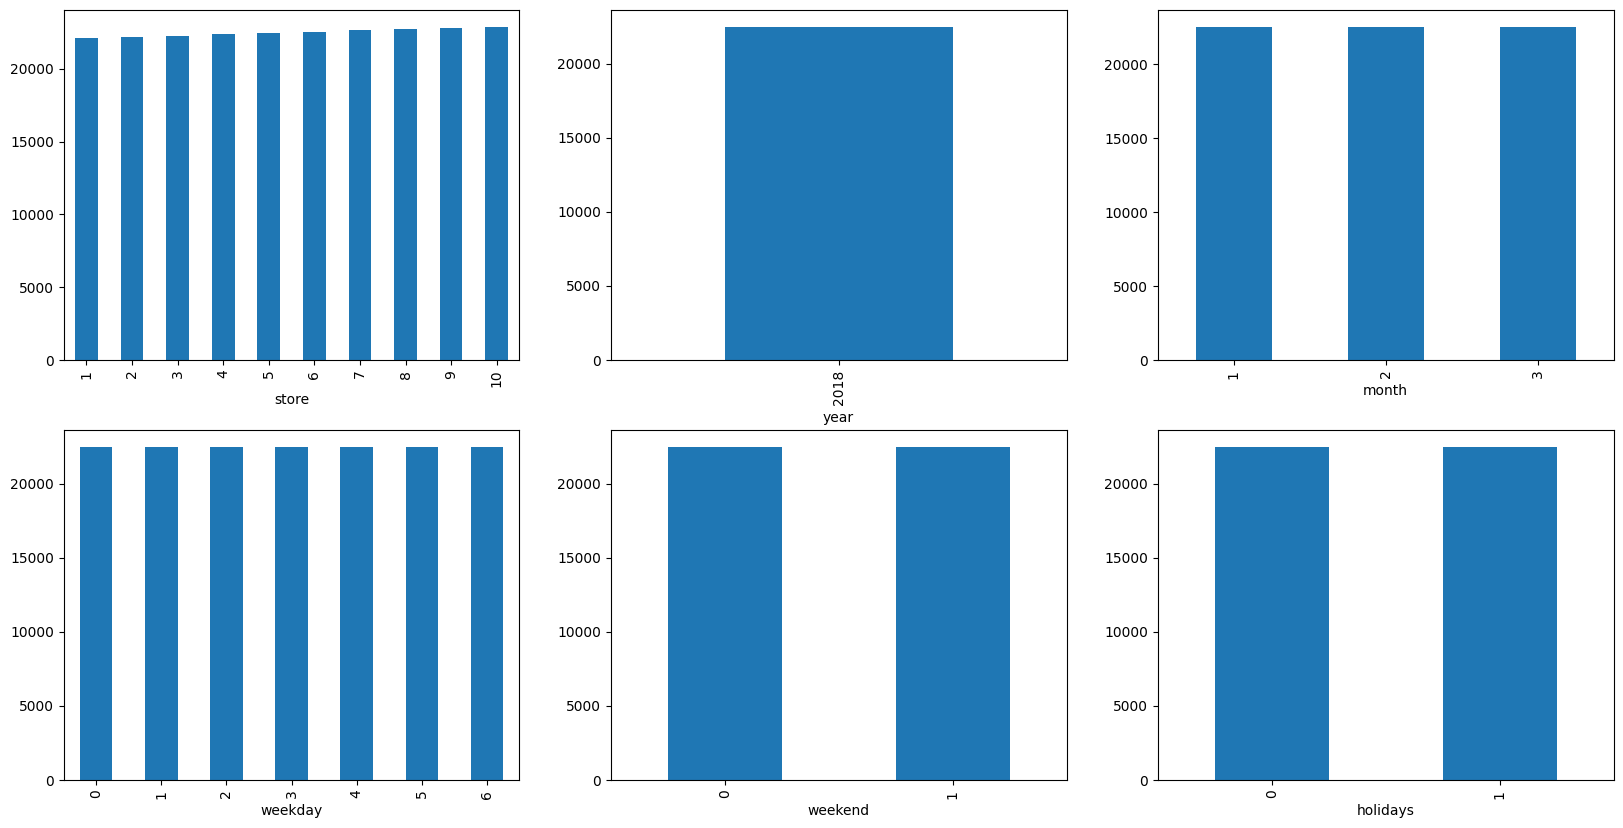

In [ ]:
df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
features = ['store', 'year', 'month', 'weekday', 'weekend', 'holidays']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df.groupby(col).mean()['id'].plot.bar()
plt.show()

# This code is modified by Susobhan Akhuli


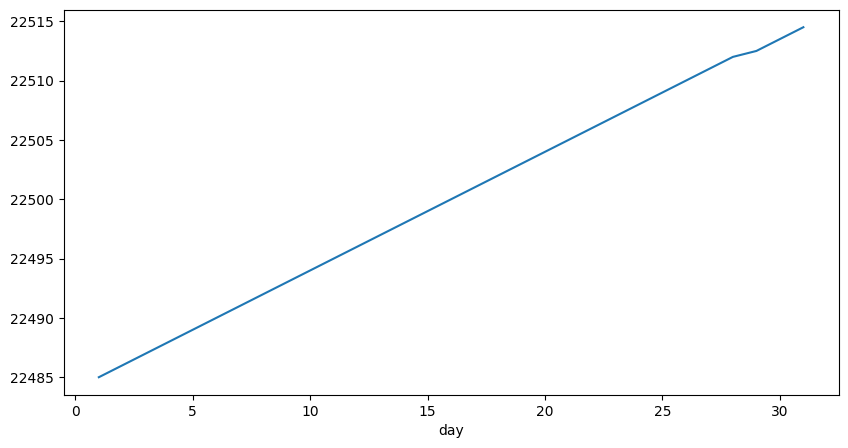

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('day').mean()['id'].plot()
plt.show()


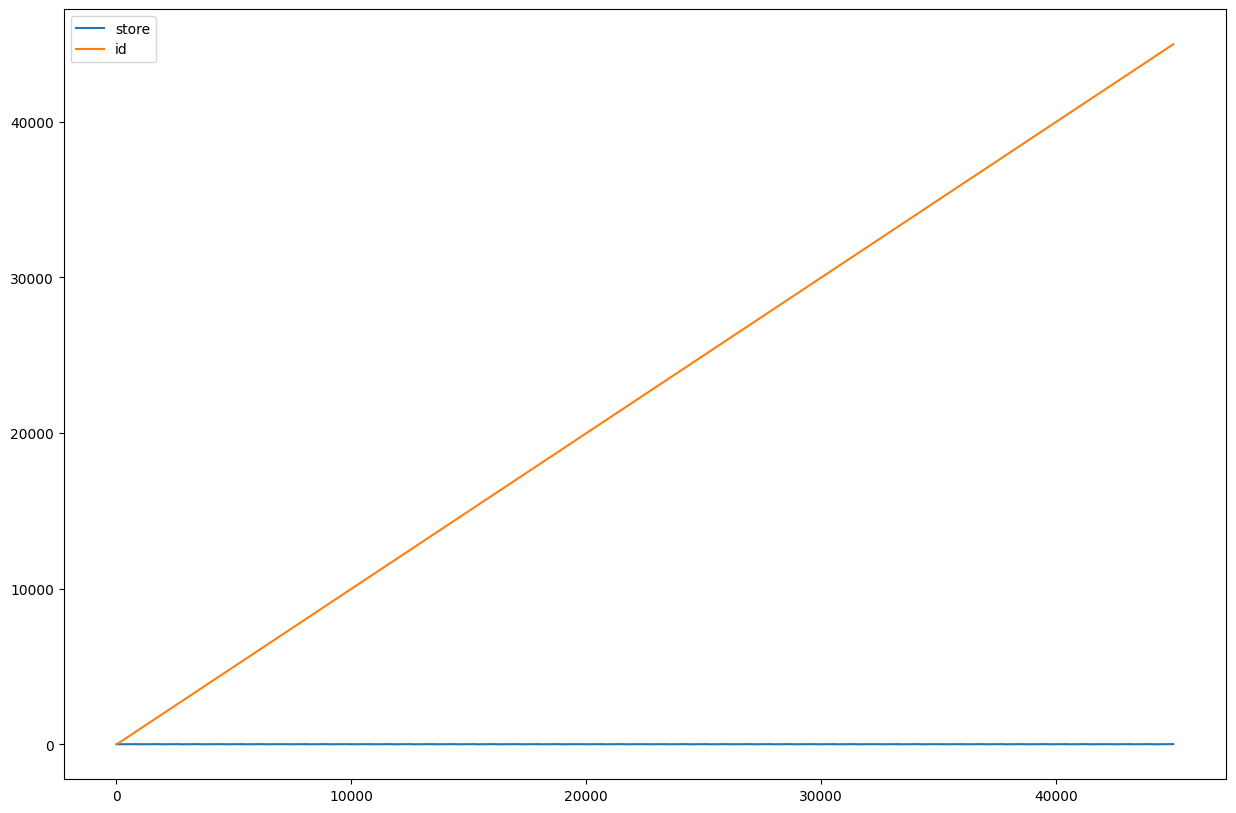

In [ ]:
plt.figure(figsize=(15, 10))

# Calculating Simple Moving Average
# for a window period of 30 days
window_size = 30
data = df[df['year']==2018]
windows = data['id'].rolling(window_size)
sma = windows.mean()
sma = sma[window_size - 1:]

data['store'].plot()
sma.plot()
plt.legend()
plt.show()


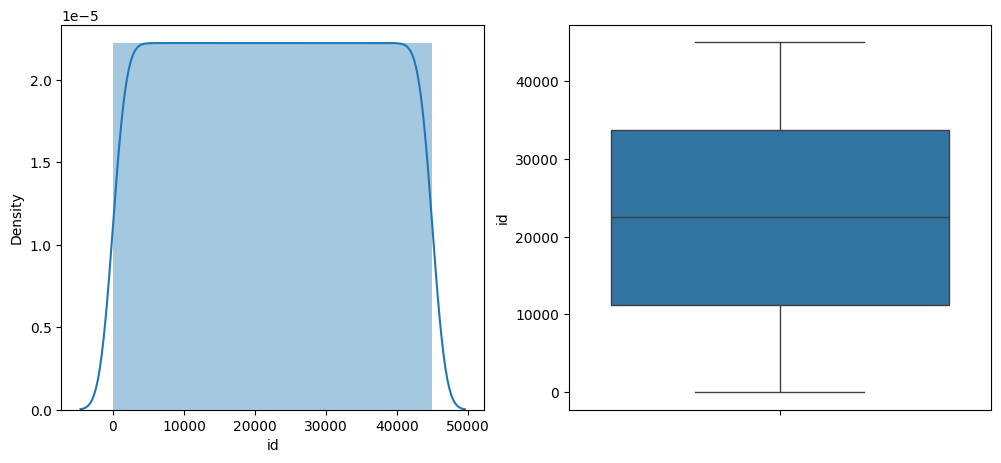

In [ ]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.distplot(df['id'])

plt.subplot(1, 2, 2)
sb.boxplot(df['id'])
plt.show()


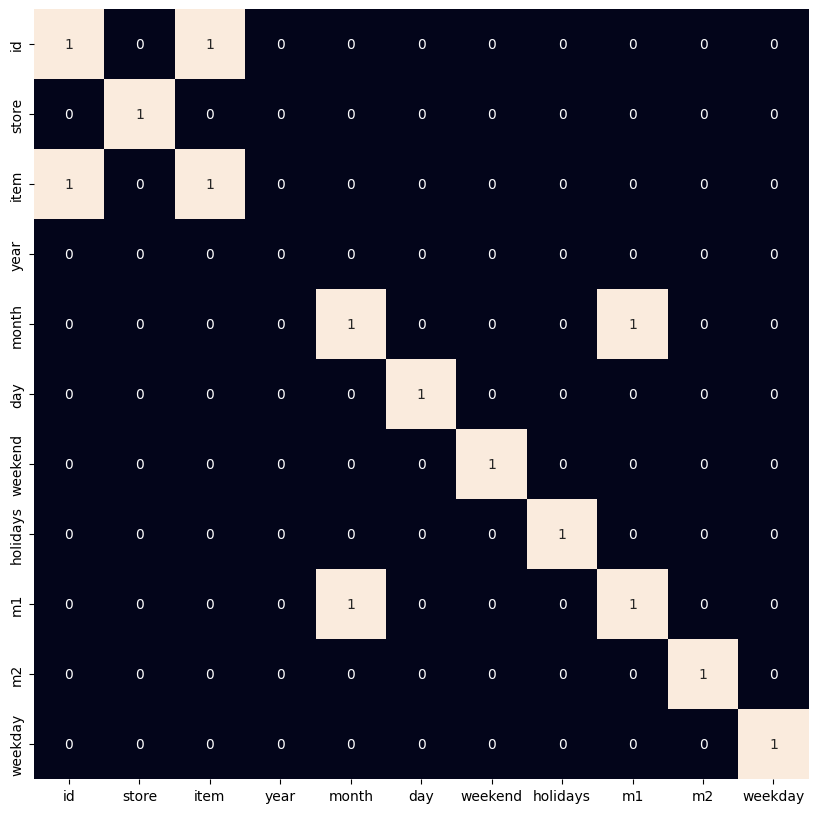

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()


In [ ]:
df = df[df['id']<140]


In [ ]:
features = df.drop(['id', 'year'], axis=1)
target = df['id'].values


X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                                  test_size = 0.05,
                                                  random_state=22)
X_train.shape, X_val.shape


((133, 9), (7, 9))

In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [ ]:
models = [LinearRegression(), XGBRegressor(), Lasso(), Ridge()]

for i in range(4):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()


LinearRegression() : 
Training Error :  2.7566921176858022e-14
Validation Error :  2.030122102171715e-14

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  0.006842323220019838
Validation Error :  0.907998766217913

Lasso() : 
Training Error :  1.7943768821224861
Validation Error :